## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2022-12-15 14:49:08.670101: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55bf4b0fc0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-15 14:49:08.670165: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-12-15 14:49:08.672433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-12-15 14:49:08.672499: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-12-15 14:49:08.672540: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-15 14:49:08.672574: I tensorflow/stream_executor/platform/default/dso_loader.cc:4

**Compiling the model**

<h2><center> $L = -\frac{1}{N} \sum_{i=1}^{N} (y_i \log(P(y_i)) + (1-y_i) \log(1-P(y_i)))$</center></h2>

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-12-15 15:05:12.966097: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10


30/30 [==============================] - 1s 28ms/step - loss: 0.5245 - accuracy: 0.7713 - val_loss: 0.3830 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3038 - accuracy: 0.9017 - val_loss: 0.3095 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2218 - accuracy: 0.9297 - val_loss: 0.2878 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1761 - accuracy: 0.9433 - val_loss: 0.2760 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1407 - accuracy: 0.9581 - val_loss: 0.2842 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1166 - accuracy: 0.9644 - val_loss: 0.3040 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0914 - accuracy: 0.9740 - val_loss: 0.3698 - val_accuracy: 0.8654
Epoch 8/20
30/30 [======

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

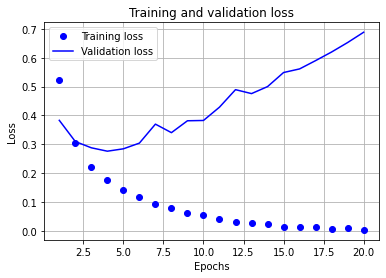

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

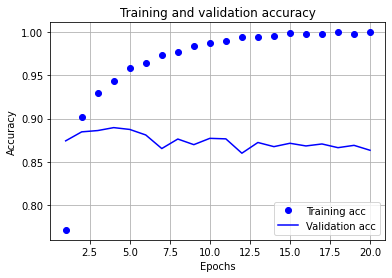

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

**Retraining a model from scratch**

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.4546 - accuracy: 0.8193
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2555 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1971 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3290 - accuracy: 0.8717


In [27]:
results

[0.32896187901496887, 0.871720016002655]

### Using a trained model to generate predictions on new data

In [28]:
model.predict(x_test)

array([[0.12801526],
       [0.99990046],
       [0.581097  ],
       ...,
       [0.07577486],
       [0.04676947],
       [0.4443284 ]], dtype=float32)

In [29]:
def print_review(index):
    test_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[index]])
    print(test_review)
    print()
    print("Actual:", bool(test_labels[index]))
    prediction_probability = model.predict(x_test[index:index+1])[0][0]
    print(f"Prediction:{prediction_probability > .5} , prediction probability:{prediction_probability:.2f}" )
    print()

print("First Review:")
print_review(0)
print()
print("Second Review:")
print_review(1)
print()
print("Third Review:")
print_review(2)
print()

First Review:
? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss

Actual: False
Prediction:False , prediction probability:0.13


Second Review:
? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant 